**1. 라벨이 각각 0,1,2,3,4,5,6,7,8,9인 10개의 손글씨를 신경망에 넣었더니 모두
$$
[{1 \over 5}, {1 \over 5}, {1 \over 5}, {1 \over 5}, {1 \over 5}, 0, 0, 0, 0,0]
$$
로 동일한  예측값이 나왔다.
평균제곱오차 (mean squared error)값을 구하시오.**

0을 원 핫 인코딩하면 $[1,0,0,0,0,0,0,0,0,0]$입니다.  
0에 대한 평균제곱오차값은
$$
{1 \over 2}\left((1-{1 \over 5})^2 + (0-{1 \over 5})^2 + (0-{1 \over 5})^2 + (0-{1 \over 5})^2 + (0-{1 \over 5})^2\right)
= {2 \over 5}
$$
입니다.  
1,2,3,4도 모두 동일합니다.  
5를 원 핫 인코딩하면  $[0,0,0,0,0,1,0,0,0,0]$입니다.  
$$
{1 \over 2}\left((0-{1 \over 5})^2 + (0-{1 \over 5})^2 + (0-{1 \over 5})^2 + (0-{1 \over 5})^2 + (0-{1 \over 5})^2 + (1-0)^2\right)
= {3 \over 5}
$$
6,7,8,9도 동일합니다.  
평균하면
$$
{1 \over 10}\left(5 \times {2 \over 5} + 5 \times {3 \over 5}\right) =  {1 \over 2}
$$
입니다.

**2.(i) functions.py의 mean$\_$squared$\_$error 함수는 싱글 데이터와 정수형 라벨에 대해서만 평균제곱오차를 구하는 코드이다. 원 핫 라벨, 정수형 라벨, 싱글 데이터, 배치 데이터 모두 정상적으로 작동되도록 코드를 수정하시오.**

In [1]:
import numpy as np

def mean_squared_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    
    if t.size != y.size:
        one_hot = np.zeros(y.shape)
        one_hot[np.arange(batch_size), t] = 1
        t = one_hot
    
    return 0.5 * np.sum((y-t)**2) / batch_size

**(ii) 1번 문제를 코드로 검산하시오.**

In [2]:
y = np.zeros((10,10))
y[:,:5] = 1/5
t = np.arange(10)
print(mean_squared_error(y, t))

0.5000000000000001


**3. (i) 라벨이 각각 $1,2,3,4,5,6,7,8,9$인 9개의 손글씨를 신경망에 넣었다. 라벨이 $k$인 손글씨를 보고 $k$일것 같다고 예측한  확률이
$$
k \over k+1
$$
이었을 때, 교차 엔트로피 (cross entropy)값을 구하시오.**

각 손글씨에 대해 신경망이 예측한 확률분포는
$$
\begin{aligned}
1 &: [*,{1 \over 2},*,*,*,*,*,*,*,*] \\
2 &: [*,*,{2 \over 3},*,*,*,*,*,*,*] \\
3 &: [*,*,*,{3 \over 4},*,*,*,*,*,*] \\
&\qquad \qquad \vdots\\
9 &: [*,*,*,*,*,*,*,*,*,{9 \over 10}]
\end{aligned}
$$
와 같습니다.  
확률분포 전체 정보가 주어져있진 않지만 교차 엔트로피를 구하는데는 문제가 없습니다.  
라벨에 해당하는 확률만 알면 되니까요.  
라벨에 해당하는 확률에 $-\log$를 씌우면 각 손글씨에 대한 교차 엔트로피 값
$$
1 : -\log {1 \over 2}, \quad 2 : -\log {2 \over 3}, \quad 3 : -\log {3 \over 4}, \quad \cdots \quad, \quad 9 : -\log {9 \over 10}
$$
을 얻을수 있습니다.  
전체 데이터에 대한 교차 엔트로피는 각 데이터에 대한 교차 엔트로피의 평균
$$
{1 \over 9}\left(-\log {1 \over 2} -\log {2 \over 3}  -\log {3 \over 4} \cdots  -\log {9 \over 10}\right)
= - {1 \over 9} \log \left({1 \over 2} \times {2 \over 3} \times {3 \over 4} \cdots {9 \over 10}\right)
= - {1 \over 9} \log {1 \over 10}
= {1 \over 9} \log 10
$$
입니다.

**(ii) 예측한 확률이
$$
1 \over e^k
$$
이었을 때, 교차 엔트로피 (cross entropy)값을 구하시오.**

각 손글씨에 대해 신경망이 예측한 확률분포는
$$
\begin{aligned}
1 &: [*,{1 \over e},*,*,*,*,*,*,*,*] \\
2 &: [*,*,{1 \over e^2},*,*,*,*,*,*,*] \\
3 &: [*,*,*,{1 \over e^3},*,*,*,*,*,*] \\
&\qquad \qquad \vdots\\
9 &: [*,*,*,*,*,*,*,*,*,{1 \over e^9}]
\end{aligned}
$$
와 같습니다.  
확률분포 전체 정보가 주어져있진 않지만 교차 엔트로피를 구하는데는 문제가 없습니다.  
라벨에 해당하는 확률만 알면 되니까요.  
라벨에 해당하는 확률에 $-\log$를 씌우면 각 손글씨에 대한 교차 엔트로피 값
$$
1 : -\log {1 \over e} =1, \quad 2 : -\log {1 \over e^2}=2, \quad 3 : -\log {1 \over e^3}=3, \quad \cdots \quad, \quad 9 : -\log {1 \over e^9}=9
$$
을 얻을수 있습니다.  
전체 데이터에 대한 교차 엔트로피는 각 데이터에 대한 교차 엔트로피의 평균
$$
{1 \over 9}\left(1+2+3+\cdots+9\right)
= {1 \over 9} \times {9\times10 \over 2}
= 5
$$
입니다.

**4. (i) 활성화 함수가 ReLU인 이층 신경망이 dictionary
$$
\{W_1 : \begin{bmatrix} 0&0&0&0&1 \\ -1&0&0&0&0 \\ 0&-1&0&0&0 \\ 0&0&-1&0&0 \\ 0&0&0&-1&0 \end{bmatrix},~
b_1 : [0,0,0,0,0],~
W_2 : \begin{bmatrix} 0&1&0&0&0 \\ 0&0&1&0&0 \\ 0&0&0&1&0 \\ 0&0&0&0&1 \\ 1&0&0&0&0 \end{bmatrix},~
b_2 : [0,0,0,0,0]
\}
$$
로 주어져 있다.
3개의 데이터 $[\log2,\log3,\log4,\log5,\log6]$와 $[\log3,\log4,\log5,\log6,\log7]$와 $[\log4,\log5,\log6,\log7,\log8]$의 라벨이 모두 $[1,0,0,0,0]$이라 하자. 배치처리로 계산하여 교차 엔트로피(cross entropy) 값을 구하시오.**

첫번째 Affine층을 통과시키면
$$
\begin{pmatrix}
\log2&\log3&\log4&\log5&\log6\\
\log3&\log4&\log5&\log6&\log7\\
\log4&\log5&\log6&\log7&\log8\\
\end{pmatrix}
\begin{pmatrix} 0&0&0&0&1 \\ -1&0&0&0&0 \\ 0&-1&0&0&0 \\ 0&0&-1&0&0 \\ 0&0&0&-1&0 \end{pmatrix}
=
\begin{pmatrix}
-\log3&-\log4&-\log5&-\log6&\log2\\
-\log4&-\log5&-\log6&-\log7&\log3\\
-\log5&-\log6&-\log7&-\log8&\log4\\
\end{pmatrix}
$$
입니다.  
은닉층에서 ReLU 함수를 좌표별로 적용하면 음수가 죽게 되어
$$
\begin{pmatrix}
0&0&0&0&\log2\\
0&0&0&0&\log3\\
0&0&0&0&\log4
\end{pmatrix}
$$
가 나옵니다.  
두번째 Affine층을 통과시키면
$$
\begin{pmatrix}
0&0&0&0&\log2\\
0&0&0&0&\log3\\
0&0&0&0&\log4
\end{pmatrix}
\begin{pmatrix} 0&1&0&0&0 \\ 0&0&1&0&0 \\ 0&0&0&1&0 \\ 0&0&0&0&1 \\ 1&0&0&0&0 \end{pmatrix}
=
\begin{pmatrix}
\log2&0&0&0&0\\
\log3&0&0&0&0\\
\log4&0&0&0&0
\end{pmatrix}
$$
입니다.  
마지막으로 소프트맥스 변환을 합니다.  
먼저 $e^x$을 적용하면
$$
\begin{pmatrix}
2&1&1&1&1\\
3&1&1&1&1\\
4&1&1&1&1
\end{pmatrix}
$$
이고 노멀라이즈하면
$$
\begin{pmatrix}
{1 \over 3}&{1 \over 6}&{1 \over 6}&{1 \over 6}&{1 \over 6}\\
{3 \over 7}&{1 \over 7}&{1 \over 7}&{1 \over 7}&{1 \over 7}\\
{1 \over 2} & {1 \over 8} & {1 \over 8} & {1 \over 8} & {1 \over 8}
\end{pmatrix}
$$
를 얻습니다.  
라벨이 세 데이터 모두 [1,0,0.0,0]이므로 맨 앞의 확률에 $-\log$를 씌운후 평균하여 교차 엔트로피
$$
{1 \over 3}\left(-\log{1 \over 3} -\log{3 \over 7} -\log{1 \over 2}\right) = {1 \over 3} \log 14
$$
를 얻습니다.

**(ii) forward.py를 수정하여 검산하시오.**

In [3]:
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

def init_network():
    network = {}
    network['W1'] = np.array([[0,0,0,0,1],[-1,0,0,0,0],[0,-1,0,0,0],[0,0,-1,0,0],[0,0,0,-1,0]])
    network['b1'] = np.array([0,0,0,0,0])
    network['W2'] = np.array([[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1],[1,0,0,0,0]])
    network['b2'] = np.array([0,0,0,0,0])
        
    return network

def forward(network, x):
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    a1 = np.dot(x,W1)+b1
    z1 = relu(a1)
    a2 = np.dot(z1,W2)+b2
    y = softmax(a2)
    
    return y

network = init_network()
x = np.log(np.array([[2,3,4,5,6],[3,4,5,6,7],[4,5,6,7,8]]))
t = np.zeros((3,5))
t[:,0]=1

y = forward(network, x)
loss = cross_entropy_error(y, t)

print(loss)

0.8796857765384196


손계산 결과와 일치하네요.

In [4]:
print(np.log(14)/3)

0.8796857765384195


**5. neuralnet$\_$mnist$\_$batch.py를 수정해서 다음에 답하시오.**

**(i) 테스트 데이터 전체에 대한 교차 엔트로피 값을 구하시오.**

In [5]:
import sys
sys.path.append('C://Users//HAN//Documents//Deep Learning from Scratch') # 각자의 경로로 수정해주세요.

import pickle
from dataset.mnist import load_mnist
from common.functions import *


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("C://Users//HAN//Documents//Deep Learning from Scratch//ch03//sample_weight.pkl", 'rb') as f: # 각자의 경로로 수정해주세요.
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

y = predict(network, x)
loss = cross_entropy_error(y, t)

print(loss)


0.22454423828125


**(ii) 가중치 행렬을 표준정규분포를 따라 랜덤하게 잡고 편향 벡터는 영벡터로 잡은후 교차 엔트로피 값을 구하시오.**

가중치를 랜덤하게 잡았기 때문에 신경망의 정확도는 93프로에서 대략 10프로정도로 떨어집니다.  
하지만 교차 엔트로피는 반대로 대폭 커집니다.

In [6]:
def init_network():
    network = {}
    network['W1'] = np.random.randn(784,50)
    network['b1'] = np.zeros(50)
    network['W2'] = np.random.randn(50,100)
    network['b2'] = np.zeros(100)
    network['W3'] = np.random.randn(100,10)
    network['b3'] = np.zeros(10)
    return network

network = init_network()

y = predict(network, x)
loss = cross_entropy_error(y, t)

print(loss)

7.358010266945635


**6. neuralnet mnist error.py를 수정해서  신경망이 맞춘 앞 25개의 이미지와 틀린 앞 25개의 이미지를 출력하고 그 밑에 교차 엔트로피값을 소숫점 4자리까지 표시하시오.**
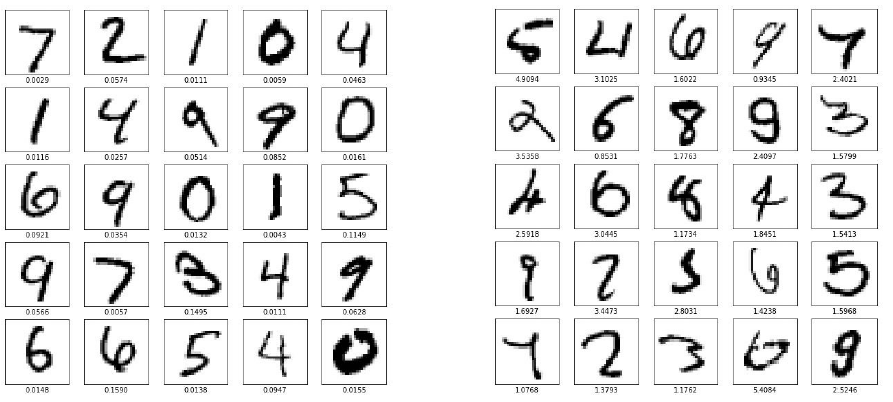

맞춘 데이터에 대해서는 낮은 교차 엔트로피 값이 틀린 데이터에 대해서는 높은 교차 엔트로피 값이 출력됩니다.

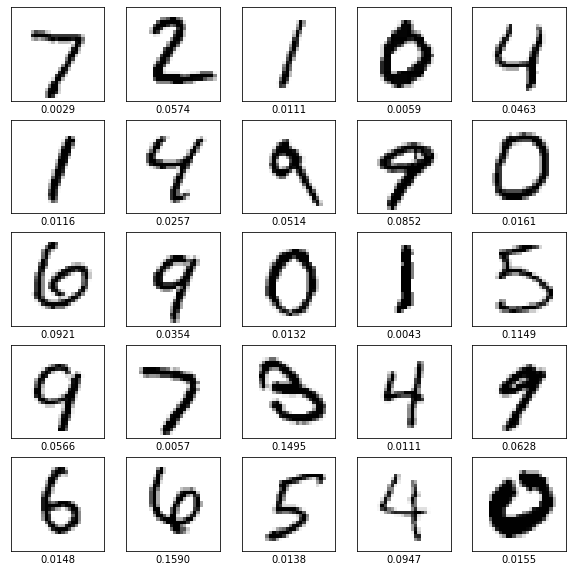

In [7]:
import matplotlib.pyplot as plt

def init_network():
    with open("C://Users//HAN//Documents//Deep Learning from Scratch//ch03//sample_weight.pkl", 'rb') as f: # 각자의 경로로 수정해주세요.
        network = pickle.load(f)
    return network

network = init_network()

correct = []
correct_loss = []

for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        correct.append(i)
        correct_loss.append(cross_entropy_error(y,t[i]))
        
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[correct[i]].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel("%0.4f" % correct_loss[i])
plt.show()

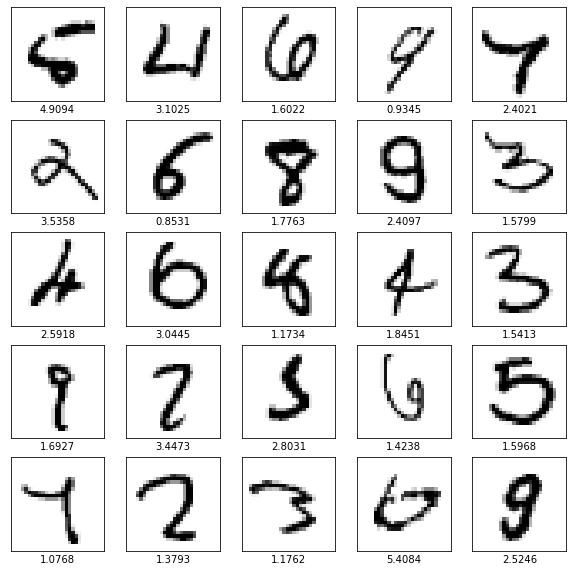

In [8]:
error = []
error_loss = []

for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p != t[i]:
        error.append(i)
        error_loss.append(cross_entropy_error(y,t[i]))
        
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[error[i]].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel("%0.4f" % error_loss[i])
plt.show()

**7. 다음은 cross_entropy_error 함수를 수정한 코드이다. 출력될 5개의 값을 순서대로 쓰시오.**

In [9]:
y = np.zeros((5,6))
for i in range(5):
    y[i,i]=np.exp(-(i+1))
    y[i,-1]=1-np.exp(-(i+1))

t = np.zeros((5,6))
for i in range(5):
    t[i,i]=1
print(t)

if t.size == y.size:
    t = t.argmax(axis=1)
print(t)

batch_size = y.shape[0]
print(batch_size)

loss = -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
print(np.log(y[np.arange(batch_size), t]))
print(loss)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
[0 1 2 3 4]
5
[-1. -2. -3. -4. -5.]
3.0
